In [1]:
#Polytrope EOS

In [2]:
# Constants
G= 6.67430*(10**(-8))
c= 2.99792458*10**10
pi=3.14

In [3]:
# Instead of r=0, we are starting at r=r0. h is step size
r0=10
h=100

In [4]:
# Polytropic EOS P=K*rho^gamma
k= 5.38*(10**9)
gamma= 1.667

In [5]:
# Defining the central density
rho_c=1*10**15

In [6]:
# Central pressure

p0= k*(rho_c)**gamma

p0

5.442297463918261e+34

In [7]:
# An approximate value of mass to start with at r0
m0=(4/3)*pi*(r0**3)*rho_c
m0

4.186666666666667e+18

In [8]:
m=m0

In [9]:
# the dm/dr function

def dmdr(r, m):
    return 4*pi*(r**2)*rho(r,p)

In [10]:
# rk4 integrator for dm/dr equation

def mrk4(r, m, h):

  for i in range(1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dmdr(r, m)
        k2 = h * dmdr(r + 0.5 * h, m + 0.5 * k1)
        k3 = h * dmdr(r + 0.5 * h, m + 0.5 * k2)
        k4 = h * dmdr(r + h, m + k3)

        # Update next value of y
        mnew = m + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        r=rnew
        m=mnew

  return mnew

In [11]:
# to suppy for dm/dr the value of rho, at first step and other steps
def rho(r,p):

  if(r==10):
    rho=rho_c

  else:
    rho=(p/k)**(1.00/gamma)

  return rho

In [12]:
# dp/dr equation

def dpdr(r, p):
  term1= -((G*m)/(r**2))
  term2= rho(r,p)
  term3= 1+(p/(rho(r,p)*(c**2)))
  term4= 1+(((4*pi*(r**3)*p))/(m*(c**2)))
  term5= 1-((2*G*m)/(r*(c**2)))
  return (term1*term2*term3*term4)/term5


In [13]:
# rk4 integrator for dp/dr equation. Once p_new is found, it finds rho_new and calls dm/dr rk4 to get m_new

number=500000    # to run over a number of times

def rk4(r0, p0, h):
    r=r0
    global p
    p=p0

    global m

    for i in range (1, number):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dpdr(r, p)
        k2 = h * dpdr(r + 0.5 * h, p + 0.5 * k1)
        k3 = h * dpdr(r + 0.5 * h, p + 0.5 * k2)
        k4 = h * dpdr(r + h, p + k3)

        # Update next value of y
        pnew = p + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        r=rnew
        p=pnew

        rho_new=(pnew/k)**(1.0/gamma)

        mnew=mrk4(r,m,h)

        m=mnew

        if(pnew < 0.00):           # to exit the computation when surface of star is encountered
           break



        # to print
        f=open('output.txt','a')
        print(rnew,rho_new,pnew,mnew)
        f.write("{} {} {} {} \n".format(rnew,rho_new,pnew,mnew))
        f.close()


    return pnew

In [14]:
# delete the output file everytime you run so that it don't append below old data

rk4(r0,p0,h)           # calling the rk4 for dp/dr

Streaming output truncated to the last 5000 lines.
802510 247637859427183.8 5.312210593529543e+33 1.032726509775406e+33
802610 247540578226388.2 5.308732302944662e+33 1.0329268182310205e+33
802710 247443315783259.66 5.305255594404015e+33 1.0331270978770647e+33
802810 247346072100688.84 5.30178046760288e+33 1.0333273486957163e+33
802910 247248847181563.3 5.298306922236349e+33 1.0335275706691592e+33
803010 247151641028767.7 5.294834957999321e+33 1.0337277637795839e+33
803110 247054453645183.6 5.291364574586508e+33 1.0339279280091872e+33
803210 246957285033689.53 5.28789577169243e+33 1.0341280633401722e+33
803310 246860135197161.1 5.284428549011419e+33 1.0343281697547485e+33
803410 246763004138470.78 5.280962906237619e+33 1.0345282472351318e+33
803510 246665891860488.2 5.277498843064985e+33 1.0347282957635446e+33
803610 246568798366079.78 5.274036359187281e+33 1.0349283153222155e+33
803710 246471723658109.03 5.270575454298084e+33 1.0351283058933795e+33
803810 246374667739436.47 5.26711612

TypeError: '<' not supported between instances of 'complex' and 'float'

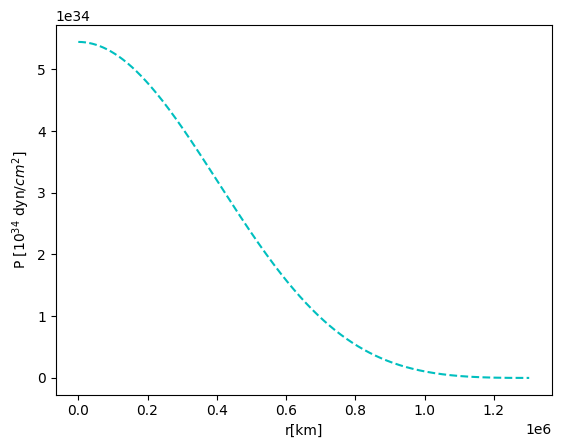

In [15]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 2]
plt.xlabel('r[km]')
plt.ylabel('P [$10^{34}$ dyn/$cm^{2}$]')
plt.plot(x, y,'c--')
plt.show()

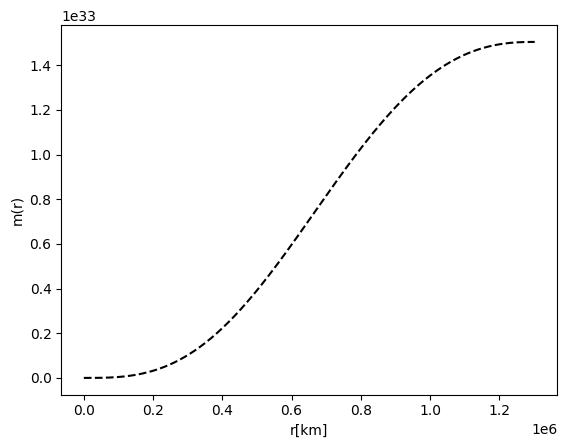

In [16]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 3]
plt.xlabel('r[km]')
plt.ylabel('m(r)')         # 1 solar mass = 2*10^33 grams
plt.plot(x, y,'k--')
plt.show()

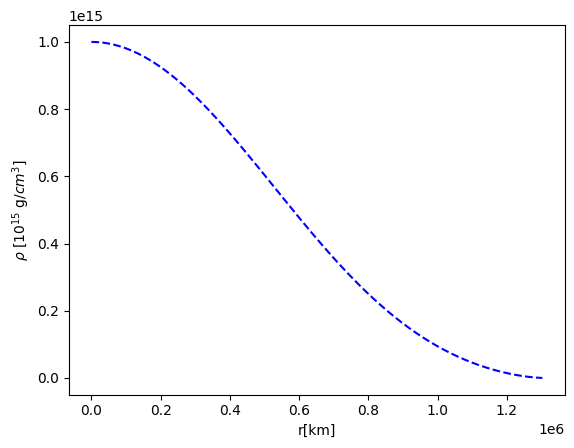

In [17]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 1]
plt.xlabel('r[km]')
plt.ylabel('$ \\rho $ [$10^{15}$ g/$cm^{3}$]')
plt.plot(x, y,'b--')
plt.show()